In [1]:
import os
os.chdir("/scratch/ak1774/runs")
import wandb

import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
colors = ["r","g","b","y","b","c"]

In [8]:
plain_es_sweep = api.sweep("adam_katona/uncategorized/nz2cbo33") 

In [4]:
api = wandb.Api()
#sweep = api.sweep("adam_katona/uncategorized/nz2cbo33")
sweep = api.sweep("adam_katona/uncategorized/1et744w7")
sweep_runs = list(sweep.runs)
sweep = api.sweep("adam_katona/uncategorized/co0z680h")
sweep_runs.extend(sweep.runs)

In [6]:
def get_unique(runs,key):
    unique_set = set([run.config[key] for run in runs])
    return unique_set

def select_where_key_is(runs,key,value):
    selected = []
    for run in runs:
        if run.config[key] == value:
            selected.append(run)
    return selected

def group_by(runs,key):
    unique_vals = get_unique(runs,key)
    grouped_runs = {}
    for val in unique_vals:
        seleced_runs = select_where_key_is(runs,key,val)
        grouped_runs[val] = seleced_runs
    return grouped_runs

envs = get_unique(sweep_runs,"env_id")
print(envs)

{'QDAntBulletEnv-v0', 'QDWalker2DBulletEnv-v0', 'QDHalfCheetahBulletEnv-v0', 'QDHopperBulletEnv-v0'}


In [10]:
def config_to_algo_name(config):
    
    # turn_update_mode_into_letters
    update_modes = config["ES_UPDATES_MODES_TO_USE"]
    update_modes_string = ""
    for update_mode in update_modes:
        if update_mode == "fitness":
            update_modes_string += "f_"
        elif update_mode == "evolvability":
            update_modes_string += "e_"
        elif update_mode == "innovation":
            update_modes_string += "i_"
        elif update_mode == "quality_evolvability":
            update_modes_string += "qe_"
        elif update_mode == "quality_innovation":
            update_modes_string += "qi_"
        elif update_mode == "quality_evolvability_innovation":
            update_modes_string += "qei_"
        else:
            raise "update_mode wtf"
    
    # turn selection_mode and metric into string
    
    def metric_to_letter(metric):
        if metric == "eval_fitness":
            return "f"
        elif metric == "evolvability":
            return "e"
        elif metric == "innovation":
            return "i"
    
    if config["BMAP_type_and_metrics"]["type"] == "single_map":
        type_metric_sting = "single_" + metric_to_letter(config["BMAP_type_and_metrics"]["metrics"][0])
    elif config["BMAP_type_and_metrics"]["type"] == "nd_sorted_map":
        type_metric_sting = "nd_"
        for metric in config["BMAP_type_and_metrics"]["metrics"]:
            type_metric_sting += metric_to_letter(metric) + "_"
    elif config["BMAP_type_and_metrics"]["type"] == "multi_map":
        type_metric_sting = "multi_"
        for metric in config["BMAP_type_and_metrics"]["metrics"]:
            type_metric_sting += metric_to_letter(metric) + "_"
    else:
        raise "wtf"
    
    label_string = type_metric_sting + "___" + update_modes_string
    return label_string
    
    
    

In [135]:
env_runs = group_by(sweep_runs,"env_id")

QDHalfCheetahBulletEnv-v0 nonempty_ratio
single_f___f_e_i_ 0.375
single_f___f_i_ 0.5185546875
single_f___f_e_ 0.3095703125
single_f___f_ 0.125
multi_f_e_i____f_e_i_qe_qi_qei_ 0.5
multi_f_e_i____f_e_i_ 0.5146484375
nd_f_e_i____f_e_i_qe_qi_qei_ 0.4931640625
nd_f_e_i____f_e_i_ 0.5048828125


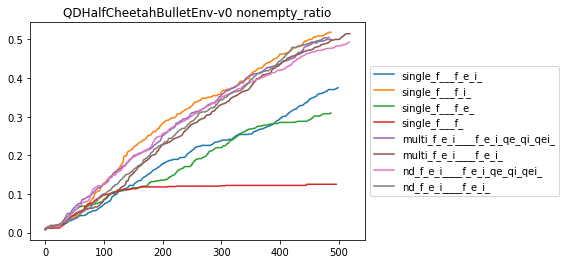

QDAntBulletEnv-v0 nonempty_ratio
single_f___f_e_i_ 0.16435185185185186
single_f___f_i_ 0.17978395061728394
single_f___f_e_ 0.08101851851851852
single_f___f_ 0.0030864197530864196
multi_f_e_i____f_e_i_qe_qi_qei_ 0.10570987654320987
multi_f_e_i____f_e_i_ 0.12037037037037036
nd_f_e_i____f_e_i_qe_qi_qei_ 0.1574074074074074
nd_f_e_i____f_e_i_ 0.1867283950617284


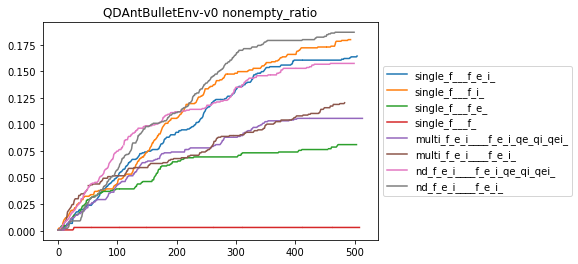

QDHopperBulletEnv-v0 nonempty_ratio
single_f___f_e_i_ 0.598
single_f___f_i_ 0.541
single_f___f_e_ 0.489
single_f___f_ 0.264
multi_f_e_i____f_e_i_qe_qi_qei_ 0.521
multi_f_e_i____f_e_i_ 0.571
nd_f_e_i____f_e_i_qe_qi_qei_ 0.519
nd_f_e_i____f_e_i_ 0.604


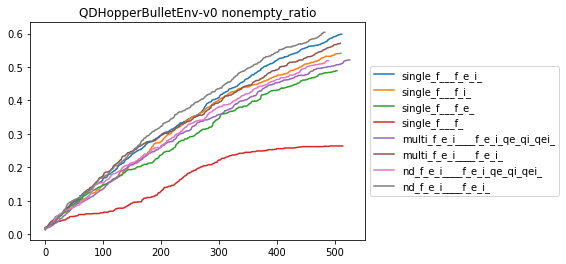

QDWalker2DBulletEnv-v0 nonempty_ratio
single_f___f_e_i_ 0.3974609375
single_f___f_i_ 0.404296875
single_f___f_e_ 0.30078125
single_f___f_ 0.029296875
multi_f_e_i____f_e_i_qe_qi_qei_ 0.443359375
multi_f_e_i____f_e_i_ 0.4775390625
nd_f_e_i____f_e_i_qe_qi_qei_ 0.423828125
nd_f_e_i____f_e_i_ 0.4111328125


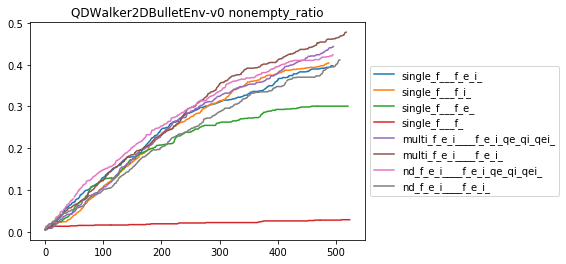

QDHalfCheetahBulletEnv-v0 qd_score
single_f___f_e_i_ -256116.7267638699
single_f___f_i_ 16248.401499125146
single_f___f_e_ -37152.74096873983
single_f___f_ 137548.31677438738
multi_f_e_i____f_e_i_qe_qi_qei_ 211048.48646776978
multi_f_e_i____f_e_i_ 28456.329036669937
nd_f_e_i____f_e_i_qe_qi_qei_ 150464.72061930204
nd_f_e_i____f_e_i_ -283866.3442729603


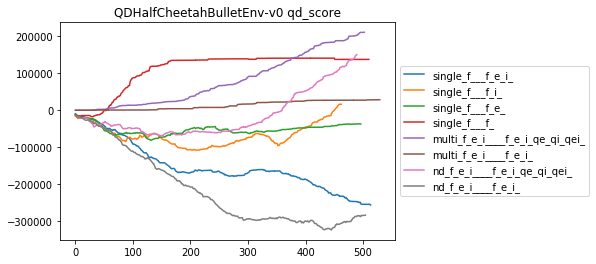

QDAntBulletEnv-v0 qd_score
single_f___f_e_i_ 92730.64783400937
single_f___f_i_ 199875.40159046964
single_f___f_e_ 66687.01270275097
single_f___f_ 1720.681927796565
multi_f_e_i____f_e_i_qe_qi_qei_ 98500.43983028355
multi_f_e_i____f_e_i_ 104632.87675279473
nd_f_e_i____f_e_i_qe_qi_qei_ 150050.00914630468
nd_f_e_i____f_e_i_ 107053.81725971685


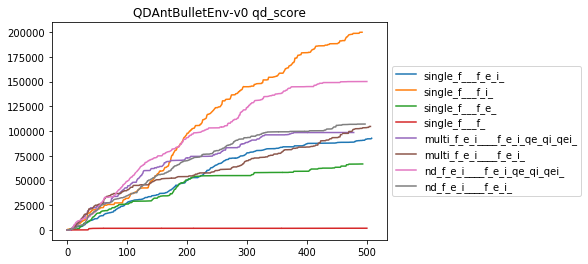

QDHopperBulletEnv-v0 qd_score
single_f___f_e_i_ 47450.70559952113
single_f___f_i_ 284465.0975245814
single_f___f_e_ 311521.5727616963
single_f___f_ 330224.5774691619
multi_f_e_i____f_e_i_qe_qi_qei_ 391803.20312098844
multi_f_e_i____f_e_i_ 60592.70028587194
nd_f_e_i____f_e_i_qe_qi_qei_ 272364.8442580044
nd_f_e_i____f_e_i_ 154760.34035508768


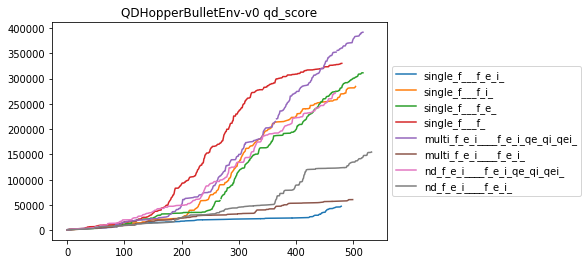

QDWalker2DBulletEnv-v0 qd_score
single_f___f_e_i_ 71276.77530078414
single_f___f_i_ 130047.53107661346
single_f___f_e_ 94001.63543738078
single_f___f_ 14462.095957902844
multi_f_e_i____f_e_i_qe_qi_qei_ 102960.1728052809
multi_f_e_i____f_e_i_ 73855.14534000806
nd_f_e_i____f_e_i_qe_qi_qei_ 138893.9788405072
nd_f_e_i____f_e_i_ 87436.5282465097


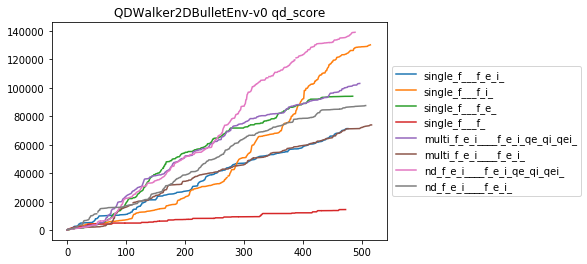

QDHalfCheetahBulletEnv-v0 best_fitness_so_far
single_f___f_e_i_ 616.360348317548
single_f___f_i_ 1758.2469444450544
single_f___f_e_ 1508.8575385729791
single_f___f_ 2614.2509918073074
multi_f_e_i____f_e_i_qe_qi_qei_ 1741.4772529527604
multi_f_e_i____f_e_i_ 937.4250484675036
nd_f_e_i____f_e_i_qe_qi_qei_ 1528.035646877999
nd_f_e_i____f_e_i_ 1726.1699190046663


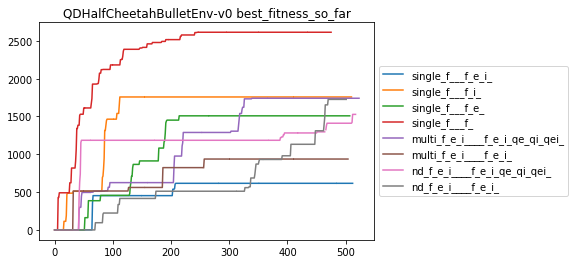

QDAntBulletEnv-v0 best_fitness_so_far
single_f___f_e_i_ 964.6560698830715
single_f___f_i_ 2042.326996250789
single_f___f_e_ 1138.9862375242838
single_f___f_ 929.1014895390007
multi_f_e_i____f_e_i_qe_qi_qei_ 982.8175646697672
multi_f_e_i____f_e_i_ 1324.2306136899851
nd_f_e_i____f_e_i_qe_qi_qei_ 1508.426288982875
nd_f_e_i____f_e_i_ 963.857269962941


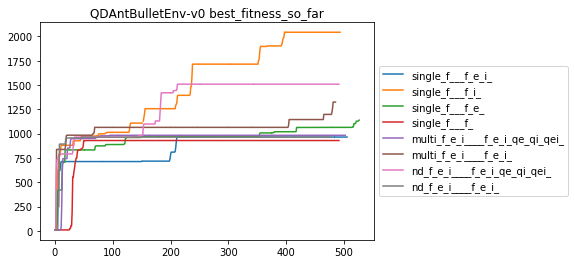

QDHopperBulletEnv-v0 best_fitness_so_far
single_f___f_e_i_ 942.2406316323511
single_f___f_i_ 1810.0498486383483
single_f___f_e_ 1635.7107208509697
single_f___f_ 2672.6422453776236
multi_f_e_i____f_e_i_qe_qi_qei_ 2348.8842750970216
multi_f_e_i____f_e_i_ 1234.3446307984495
nd_f_e_i____f_e_i_qe_qi_qei_ 2478.153304742865
nd_f_e_i____f_e_i_ 2029.2731330730405


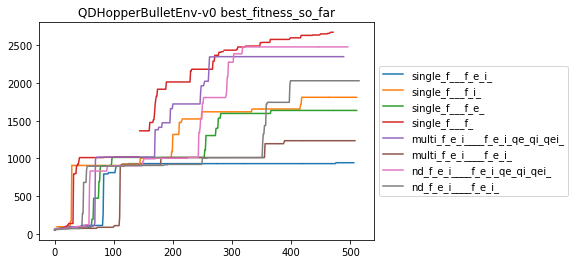

QDWalker2DBulletEnv-v0 best_fitness_so_far
single_f___f_e_i_ 779.9017592563675
single_f___f_i_ 1074.7338809723215
single_f___f_e_ 851.6591013255816
single_f___f_ 1000.9621490160858
multi_f_e_i____f_e_i_qe_qi_qei_ 987.6243691572297
multi_f_e_i____f_e_i_ 746.9456416064677
nd_f_e_i____f_e_i_qe_qi_qei_ 982.7673171536019
nd_f_e_i____f_e_i_ 802.559465782709


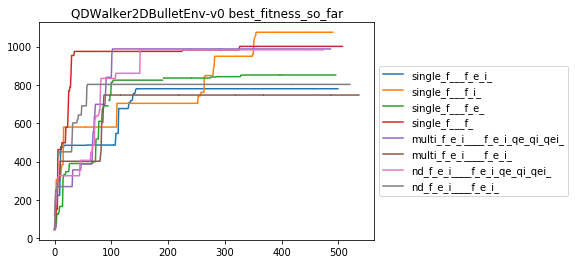

In [49]:
keys_to_plot = ["nonempty_ratio","qd_score","best_fitness_so_far"]

for plot_key in keys_to_plot:
    for env_name,runs in env_runs.items():
        print(env_name,plot_key)
        labels = []
        for run in runs:
            run_df = run.history()
            labels.append(config_to_algo_name(run.config))
            plt.plot(run_df[plot_key])
            print(labels[-1],run_df[plot_key].values[-1])
        plt.legend(labels,loc='center left', bbox_to_anchor=(1, 0.5))
        plt.title(env_name+" "+plot_key)
        plt.show()


In [136]:
run_folders = [x[0] for x in os.walk("/scratch/ak1774/runs/large_files")]
def get_run_dir(run_id):
    for f in run_folders:
        if run_id in f:
            return f
    raise "run not found"
    return None

QDHalfCheetahBulletEnv-v0
1ow92tvv
h30949bd
6ke8jv17
4tepkw5c
bcqamysy
x6i6m3pa
xinpfq1u
gnirhruc


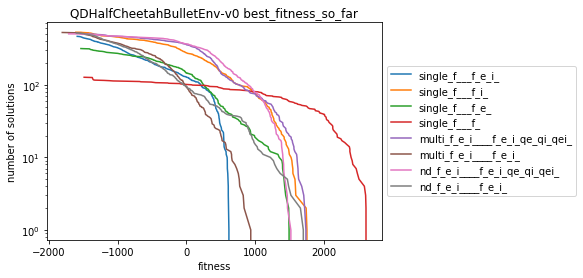

QDAntBulletEnv-v0
gvxdleuu
99liu892
dw56qs7m
g9zl7kmh
rw4k0jmx
khkpb9hk
9hg4i9r0
0bz1xmwd


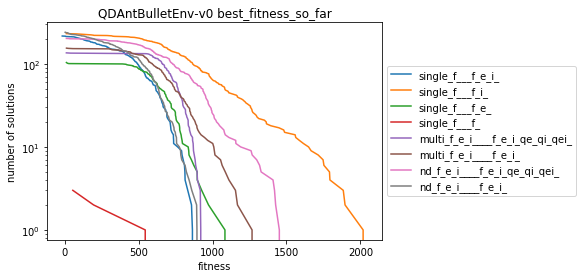

QDHopperBulletEnv-v0
65g23rmn
xrhfctd5
swyte83y
lfw5k1um
9n58rgiu
ttg6t6hb
pbycgy5t
s5ya7ak4


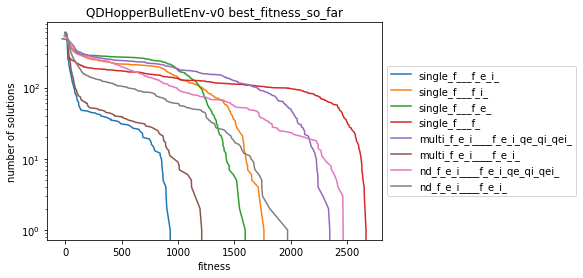

QDWalker2DBulletEnv-v0
7oq5ty1r
ruq9nctk
2zi0pzb0
if4u00li
b9vyeloj
iztramve
dfsz09kj
uuf0a9dh


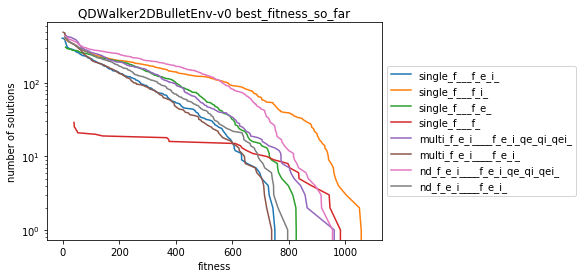

In [139]:
from es_map import behavior_map

for env_name,runs in env_runs.items():
    print(env_name)
    labels = []
    for run in runs:
        
        run_dir = get_run_dir(run.id)
        print(run.id)
        
        b_map_path = run_dir+"/b_map.npy"
        if os.path.exists(b_map_path) is False:
            print("missing b_map ",b_map_path)
            continue
        
        b_map_data = np.load(b_map_path,allow_pickle=True)
        if run.config["BMAP_type_and_metrics"]["type"] == "multi_map":
            b_map = behavior_map.Grid_behaviour_multi_map(run.config)
            b_map.data = b_map_data
            nonemty = b_map.get_non_empty_cells("eval_fitness")
        else:
            b_map = behavior_map.Grid_behaviour_map(run.config)
            b_map.data = b_map_data
            nonemty = b_map.get_non_empty_cells()
            
        if run.config["BMAP_type_and_metrics"]["type"] == "nd_sorted_map":
            fitnesses = [ max([elite["eval_fitness"] for elite in cell["elites"]]) for cell in nonemty ]
        else:
            fitnesses = [cell["elite"]["eval_fitness"] for cell in nonemty]
            
        fitnesses = sorted(fitnesses)
        
        labels.append(config_to_algo_name(run.config))
        plt.plot(fitnesses[::-1],range(len(fitnesses)))
        
    plt.legend(labels,loc='center left', bbox_to_anchor=(1, 0.5))
    plt.yscale("log")
    plt.xlabel("fitness")
    plt.ylabel("number of solutions")
    plt.title(env_name+" "+plot_key)
    plt.show()
        
        

    
    
    








In [43]:
run = sweep_runs[0]

In [38]:


#for run in sweep_runs:
#    print(run.config["env_id"])

for run in sweep_runs:
    #print(run.config["ES_UPDATES_MODES_TO_USE"])
    print(run.config["BMAP_type_and_metrics"])

{'type': 'single_map', 'metrics': ['eval_fitness']}
{'type': 'single_map', 'metrics': ['eval_fitness']}
{'type': 'single_map', 'metrics': ['eval_fitness']}
{'type': 'single_map', 'metrics': ['eval_fitness']}
{'type': 'single_map', 'metrics': ['eval_fitness']}
{'type': 'single_map', 'metrics': ['eval_fitness']}
{'type': 'single_map', 'metrics': ['eval_fitness']}
{'type': 'single_map', 'metrics': ['eval_fitness']}
{'type': 'single_map', 'metrics': ['eval_fitness']}
{'type': 'single_map', 'metrics': ['eval_fitness']}
{'type': 'single_map', 'metrics': ['eval_fitness']}
{'type': 'single_map', 'metrics': ['eval_fitness']}
{'type': 'single_map', 'metrics': ['eval_fitness']}
{'type': 'single_map', 'metrics': ['eval_fitness']}
{'type': 'single_map', 'metrics': ['eval_fitness']}
{'type': 'single_map', 'metrics': ['eval_fitness']}
{'type': 'multi_map', 'metrics': ['eval_fitness', 'evolvability', 'innovation']}
{'type': 'multi_map', 'metrics': ['eval_fitness', 'evolvability', 'innovation']}
{'type

In [11]:
run.config

{'ES_lr': 0.01,
 'env_id': 'QDAntBulletEnv-v0',
 'ES_sigma': 0.02,
 'env_args': {'use_norm_obs': True},
 'ES_popsize': 2000,
 'ES_L2_COEFF': 0.005,
 'policy_args': {'init': 'normc',
  'layers': [128, 128],
  'activation': 'tanh',
  'action_noise': 0.01},
 'ALGORITHM_TYPE': 'MAP_ES',
 'PLOT_FREQUENCY': 100,
 'ES_OPTIMIZER_TYPE': 'ADAM',
 'GA_MUTATION_POWER': 0.02,
 'ES_NUM_GENERATIONS': 1000,
 'GA_NUM_EVALUATIONS': 10,
 'CHECKPOINT_FREQUENCY': 100,
 'GA_MULTI_PARENT_MODE': True,
 'BMAP_type_and_metrics': {'type': 'single_map', 'metrics': ['eval_fitness']},
 'ES_UPDATES_MODES_TO_USE': ['fitness'],
 'ES_EVALUATION_BATCH_SIZE': 5,
 'ES_PARENT_SELECTION_MODE': 'rank_proportional',
 'GA_PARENT_SELECTION_MODE': 'rank_proportional',
 'ES_CENTRAL_NUM_EVALUATIONS': 30,
 'GA_CHILDREN_PER_GENERATION': 200,
 'map_elites_grid_description': {'bc_limits': [[0, 1], [0, 1], [0, 1], [0, 1]],
  'grid_dims': [6, 6, 6, 6]},
 'GA_MAP_ELITES_NUM_GENERATIONS': 1000,
 'ES_ND_SORT_MAX_FRONT_SIZE_TO_KEEP': 6,
 'N

In [23]:
run.history()

,current_evolvability,best_fitness_so_far,_step,_runtime,current_children_fitness_std,current_children_fitness_mean,nonempty_ratio,qd_score,current_entropy,current_innovation,best_evolvability_so_far,current_eval_fitness,nonempty_cells,evaluations_so_far,generation_number,_timestamp,b_map_plot
0,0.000006,10.001516,0,44,0.040016,9.953739,0.000772,10.001516,3.121097e-06,0.000000,0.000006,9.996382,1.0,0,0,1642868929,NaN
1,0.000005,10.001516,1,49,0.052234,9.951088,0.000772,10.001516,2.497190e-06,0.000100,0.000006,9.989919,1.0,2000,1,1642868934,NaN
2,0.000006,10.001516,2,54,0.047763,9.951064,0.000772,10.001516,3.121097e-06,0.000125,0.000006,9.988058,1.0,4000,2,1642868939,NaN
3,0.000001,10.001516,6,75,0.022847,9.953655,0.000772,10.001516,6.245316e-07,0.000025,0.000006,9.987676,1.0,12000,6,1642868960,NaN
4,0.000063,10.001516,10,95,0.049749,9.919810,0.000772,10.001516,3.110895e-05,0.000293,0.000063,9.964118,1.0,20000,10,1642868980,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,0.003872,929.101490,999,111861,62.952178,527.520043,0.003086,1720.681928,4.895334e-03,0.030207,0.866055,516.609213,4.0,1978000,989,1642980746,NaN
487,0.005568,929.101490,1004,112504,61.476348,528.422830,0.003086,1720.681928,5.669440e-03,0.031123,0.866055,522.253697,4.0,1988000,994,1642981389,NaN
488,0.004780,929.101490,1006,112752,62.629814,523.369567,0.003086,1720.681928,5.426401e-03,0.031615,0.866055,527.861106,4.0,1992000,996,1642981637,NaN
489,0.004250,929.101490,1008,113008,60.455645,524.897623,0.003086,1720.681928,5.137246e-03,0.031323,0.866055,504.612678,4.0,1996000,998,1642981893,NaN


In [60]:
a = plain_es_sweep.runs[1].history()

In [62]:
a.columns

Index(['cumm_qd_score', '_step', 'b_map_cumm_plot', 'b_map_plot',
       'b_map_accumulation_plot', 'cumm_nonempty_cells', '_runtime',
       'nonempty_ratio', 'qd_score', 'cumm_nonempty_ratio', 'nonempty_cells',
       'evaluations_so_far', 'generation_number', '_timestamp',
       'current_evolvability', 'best_fitness_so_far',
       'current_children_fitness_std', 'current_children_fitness_mean',
       'current_innovation', 'best_evolvability_so_far',
       'current_eval_fitness'],
      dtype='object')

QDAntBulletEnv-v0 nonempty_ratio
single_f___e_ 0.06327160493827161
single_f___qe_ 0.0007716049382716049
single_f___f_ 0.0023148148148148147


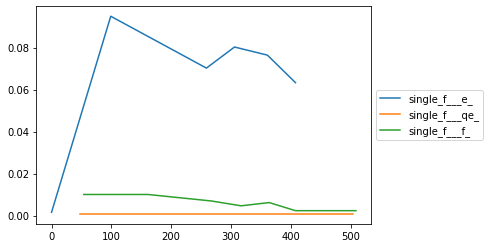

QDWalker2DBulletEnv-v0 nonempty_ratio
single_f___e_ 0.0693359375
single_f___qe_ 0.126953125
single_f___f_ 0.02734375


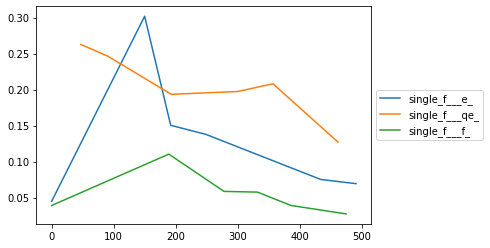

QDHalfCheetahBulletEnv-v0 nonempty_ratio
single_f___e_ 0.1533203125
single_f___qe_ 0.1064453125
single_f___f_ 0.0087890625


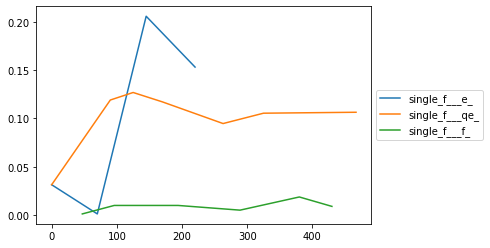

QDHopperBulletEnv-v0 nonempty_ratio
skipping failed run...
skipping failed run...
skipping failed run...
QDAntBulletEnv-v0 cumm_nonempty_ratio
single_f___e_ 0.11882716049382716
single_f___qe_ 0.0007716049382716049
single_f___f_ 0.038580246913580245


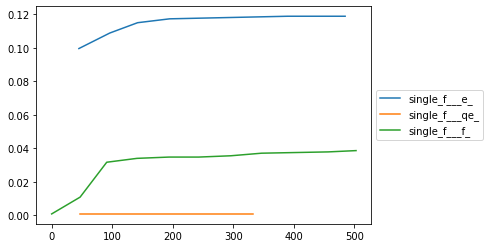

QDWalker2DBulletEnv-v0 cumm_nonempty_ratio
single_f___e_ 0.57421875
single_f___qe_ 0.3310546875
single_f___f_ 0.2919921875


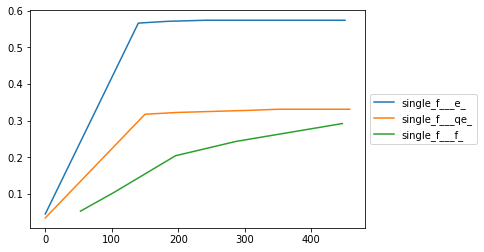

QDHalfCheetahBulletEnv-v0 cumm_nonempty_ratio
single_f___e_ 0.5126953125
single_f___qe_ 0.4912109375
single_f___f_ 0.04296875


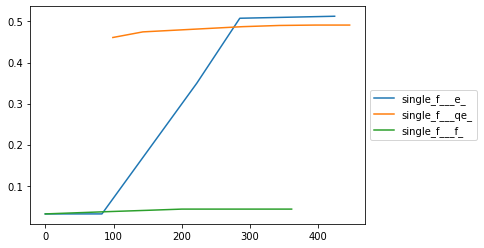

QDHopperBulletEnv-v0 cumm_nonempty_ratio
skipping failed run...
skipping failed run...
skipping failed run...
QDAntBulletEnv-v0 best_fitness_so_far
single_f___e_ 700.9561764442022
single_f___qe_ 14.281001405246593
single_f___f_ 3686.33164438786


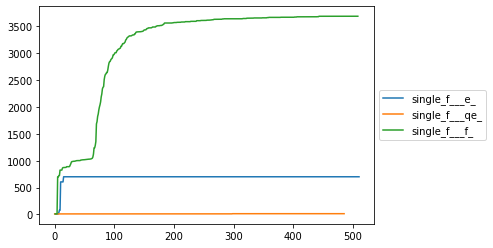

QDWalker2DBulletEnv-v0 best_fitness_so_far
single_f___e_ 432.4138231744239
single_f___qe_ 1026.4533298818153
single_f___f_ 3093.5596706479964


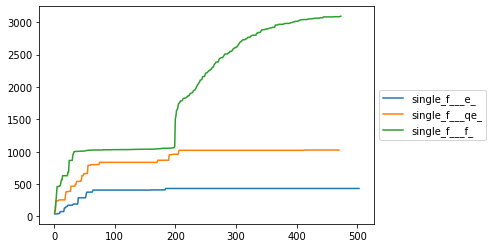

QDHalfCheetahBulletEnv-v0 best_fitness_so_far
single_f___e_ 0.0
single_f___qe_ 2504.2406710985333
single_f___f_ 1028.0193635443648


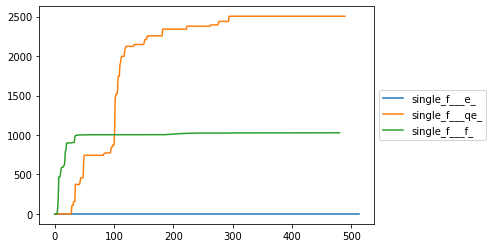

QDHopperBulletEnv-v0 best_fitness_so_far
skipping failed run...
skipping failed run...
skipping failed run...
QDAntBulletEnv-v0 qd_score
single_f___e_ 24441.370606937737
single_f___qe_ 24.206868506680667
single_f___f_ 9988.426421296515


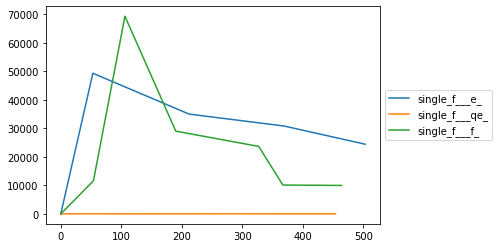

QDWalker2DBulletEnv-v0 qd_score
single_f___e_ 20094.59357199489
single_f___qe_ 125128.82243693399
single_f___f_ 77991.17627578725


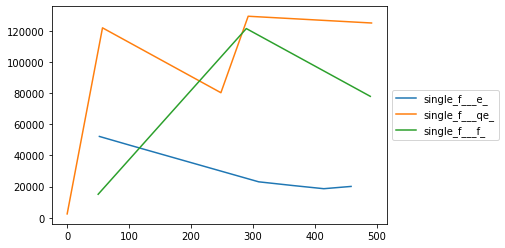

QDHalfCheetahBulletEnv-v0 qd_score
single_f___e_ -356918.80483044416
single_f___qe_ 191412.93079122424
single_f___f_ 7532.400234327232


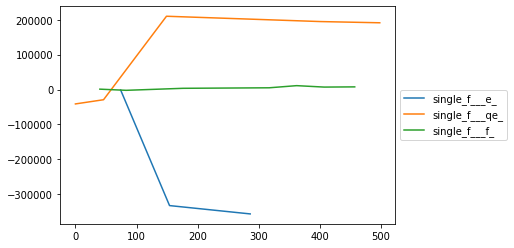

QDHopperBulletEnv-v0 qd_score
skipping failed run...
skipping failed run...
skipping failed run...


In [13]:
env_plain_runs = env_runs = group_by(plain_es_sweep.runs,"env_id")
#for run in plain_es_sweep.runs:
#    print(run.config["env_id"],run.config["ES_UPDATES_MODES_TO_USE"])
#    df = run.history()
#    df["nonempty_ratio"].values[-1]
#    df["cumm_nonempty_ratio"].values[-1]
    
    
keys_to_plot = ["nonempty_ratio","cumm_nonempty_ratio","best_fitness_so_far","qd_score"]

for plot_key in keys_to_plot:
    for env_name,runs in env_plain_runs.items():
        print(env_name,plot_key)
        labels = []
        for run in runs:
            if "cumm_nonempty_ratio" not in run.summary:
                print("skipping failed run...")
                continue
            run_df = run.history()
            labels.append(config_to_algo_name(run.config))
            print(labels[-1],run_df[plot_key].dropna().values[-1])
            plt.plot(run_df[plot_key].dropna())
            plt.legend(labels,loc='center left', bbox_to_anchor=(1, 0.5))
            
        plt.show()

QDHalfCheetahBulletEnv-v0 nonempty_ratio
single_f___e_ 0.041015625
single_f___qe_ 0.0947265625
single_f___f_ 0.009765625


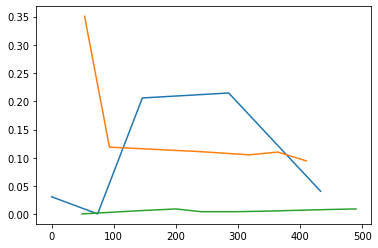

QDAntBulletEnv-v0 nonempty_ratio
single_f___e_ 0.06327160493827161
single_f___qe_ 0.0007716049382716049
single_f___f_ 0.006172839506172839


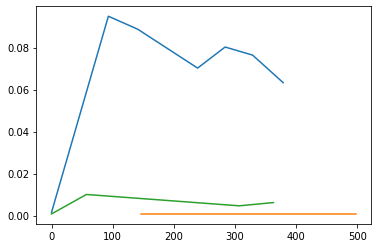

QDHopperBulletEnv-v0 nonempty_ratio
skipping failed run...
skipping failed run...
skipping failed run...
QDWalker2DBulletEnv-v0 nonempty_ratio
single_f___e_ 0.072265625
single_f___qe_ 0.1337890625
single_f___f_ 0.0380859375


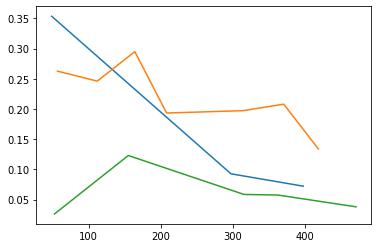

QDHalfCheetahBulletEnv-v0 cumm_nonempty_ratio
single_f___e_ 0.5126953125
single_f___qe_ 0.490234375
single_f___f_ 0.0478515625


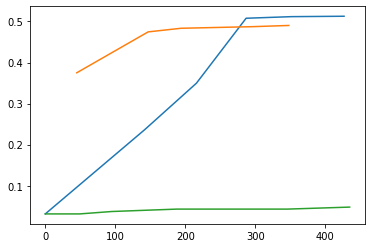

QDAntBulletEnv-v0 cumm_nonempty_ratio
single_f___e_ 0.11882716049382716
single_f___qe_ 0.0007716049382716049
single_f___f_ 0.037037037037037035


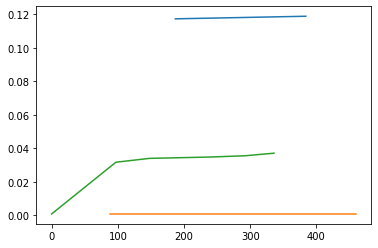

QDHopperBulletEnv-v0 cumm_nonempty_ratio
skipping failed run...
skipping failed run...
skipping failed run...
QDWalker2DBulletEnv-v0 cumm_nonempty_ratio
single_f___e_ 0.57421875
single_f___qe_ 0.3330078125
single_f___f_ 0.29296875


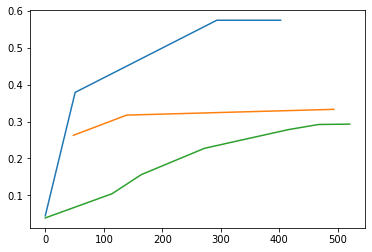

QDHalfCheetahBulletEnv-v0 best_fitness_so_far
single_f___e_ 0.0
single_f___qe_ 2504.2406710985333
single_f___f_ 1028.0193635443648


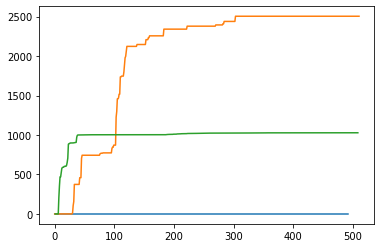

QDAntBulletEnv-v0 best_fitness_so_far
single_f___e_ 700.9561764442022
single_f___qe_ 14.281001405246593
single_f___f_ 3686.33164438786


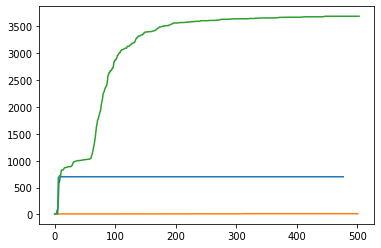

QDHopperBulletEnv-v0 best_fitness_so_far
skipping failed run...
skipping failed run...
skipping failed run...
QDWalker2DBulletEnv-v0 best_fitness_so_far
single_f___e_ 432.4138231744239
single_f___qe_ 1026.4533298818153
single_f___f_ 3094.4553916350196


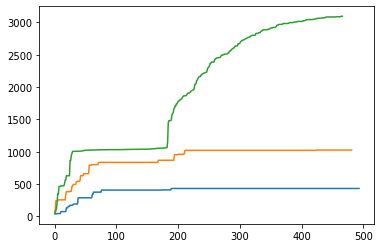

In [79]:
env_plain_runs = env_runs = group_by(plain_es_sweep.runs,"env_id")
#for run in plain_es_sweep.runs:
#    print(run.config["env_id"],run.config["ES_UPDATES_MODES_TO_USE"])
#    df = run.history()
#    df["nonempty_ratio"].values[-1]
#    df["cumm_nonempty_ratio"].values[-1]
    
    
keys_to_plot = ["nonempty_ratio","cumm_nonempty_ratio","best_fitness_so_far"]

for plot_key in keys_to_plot:
    for env_name,runs in env_plain_runs.items():
        print(env_name,plot_key)
        labels = []
        for run in runs:
            if "cumm_nonempty_ratio" not in run.summary:
                print("skipping failed run...")
                continue
            run_df = run.history()
            labels.append(config_to_algo_name(run.config))
            print(labels[-1],run_df[plot_key].dropna().values[-1])
            plt.plot(run_df[plot_key].dropna())
            
        plt.show()

In [83]:
run.id

'l0sst3kk'

In [102]:
run = sweep_runs[6]

In [103]:
import os

In [104]:
run_folders = [x[0] for x in os.walk("/scratch/ak1774/runs/large_files")]
def get_run_dir(run_id):
    for f in run_folders:
        if run_id in f:
            return f
    raise "run not found"
    return None


In [105]:
run_dir = get_run_dir(run.id)

In [106]:
run_dir

'/scratch/ak1774/runs/large_files/run-20220123_194056-ruq9nctk'

In [107]:
b_archive = np.load(run_dir+"/b_archive.npy",allow_pickle=True)

In [109]:
b_map = np.load(run_dir+"/b_map.npy",allow_pickle=True)

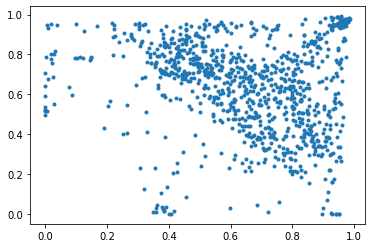

In [108]:
plt.plot(b_archive[:,0],b_archive[:,1],".")

In [101]:
sweep_runs[6].config

{'ES_lr': 0.01,
 'env_id': 'QDWalker2DBulletEnv-v0',
 'ES_sigma': 0.02,
 'env_args': {'use_norm_obs': True},
 'ES_popsize': 2000,
 'ES_L2_COEFF': 0.005,
 'policy_args': {'init': 'normc',
  'layers': [128, 128],
  'activation': 'tanh',
  'action_noise': 0.01},
 'ALGORITHM_TYPE': 'MAP_ES',
 'PLOT_FREQUENCY': 100,
 'ES_OPTIMIZER_TYPE': 'ADAM',
 'GA_MUTATION_POWER': 0.02,
 'ES_NUM_GENERATIONS': 1000,
 'GA_NUM_EVALUATIONS': 10,
 'CHECKPOINT_FREQUENCY': 100,
 'GA_MULTI_PARENT_MODE': True,
 'BMAP_type_and_metrics': {'type': 'single_map', 'metrics': ['eval_fitness']},
 'ES_UPDATES_MODES_TO_USE': ['fitness', 'innovation'],
 'ES_EVALUATION_BATCH_SIZE': 5,
 'ES_PARENT_SELECTION_MODE': 'rank_proportional',
 'GA_PARENT_SELECTION_MODE': 'rank_proportional',
 'ES_CENTRAL_NUM_EVALUATIONS': 30,
 'GA_CHILDREN_PER_GENERATION': 200,
 'map_elites_grid_description': {'bc_limits': [[0, 1], [0, 1], [0, 1], [0, 1]],
  'grid_dims': [6, 6, 6, 6]},
 'GA_MAP_ELITES_NUM_GENERATIONS': 1000,
 'ES_ND_SORT_MAX_FRONT_SI

In [113]:
run_folders = [x[0] for x in os.walk("/scratch/ak1774/runs/large_files")]
def get_run_dir(run_id):
    for f in run_folders:
        if run_id in f:
            return f
    raise "run not found"
    return None

from es_map import behavior_map

run_dir = get_run_dir(run.id)

b_map = behavior_map.Grid_behaviour_map(run.config)
b_map_class.data = np.load(run_dir+"/b_map.npy",allow_pickle=True)
nonemty = b_map_class.get_non_empty_cells()
fitnesses = [cell["elite"]["eval_fitness"] for cell in nonemty]
fitnesses = sorted(fitnesses)
plt.plot(fitnesses[::-1],range(len(fitnesses)))
plt.yscale("log")
plt.xlabel("fitness")
plt.ylabel("number of solutions")

In [115]:
b_map_class.data = b_map

In [117]:
nonemty = b_map_class.get_non_empty_cells()

In [122]:
fitnesses = [cell["elite"]["eval_fitness"] for cell in nonemty]

In [121]:
nonemty[0]["elite"].keys()

dict_keys(['params', 'ID', 'parent_ID', 'generation_created', 'child_eval', 'eval_fitness', 'eval_bc', 'evolvability', 'innovation', 'entropy', 'innovation_over_time'])

In [124]:
fitnesses = sorted(fitnesses)

Text(0, 0.5, 'number of solutions')

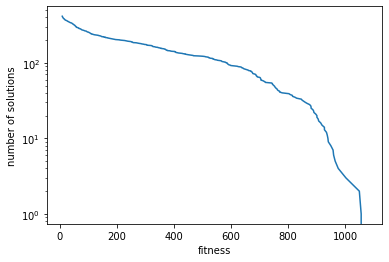

In [132]:
plt.plot(fitnesses[::-1],range(len(fitnesses)))
plt.yscale("log")
plt.xlabel("fitness")
plt.ylabel("number of solutions")

In [149]:
run = sweep_runs[15]
run_dir = get_run_dir(run.id)
import pickle
with open(run_dir+'/obs_stats.pickle', 'rb') as handle:
    obs_history = pickle.load(handle)
#b_map = behavior_map.Grid_behaviour_map(run.config)
#b_map_class.data = np.load(run_dir+"/b_map.npy",allow_pickle=True)

In [152]:
def calculate_obs_stats(obs_stats):
    sum = obs_stats["sum"]
    sumsq = obs_stats["sumsq"]
    count = obs_stats["count"]
    
    if count == 0:
        return np.zeros_like(sum),np.ones_like(sum)
    mean = sum / count
    std = np.sqrt(np.maximum(sumsq / count - np.square(mean), 1e-2))
    return mean,std
    

In [158]:
means = []
stds = []

for i in range(len(obs_history)):
    mean,std = calculate_obs_stats(obs_history[i])
    means.append(mean)
    stds.append(std)

In [159]:
means = np.array(means)
stds = np.array(stds)

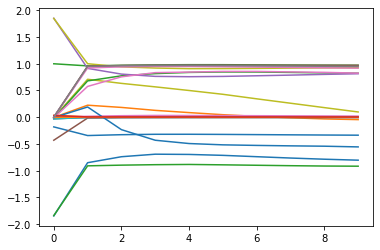

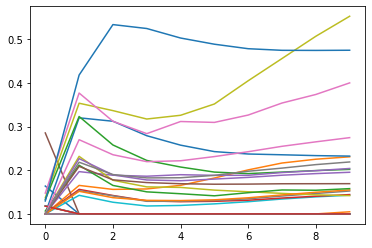

In [160]:
plt.plot(means);
plt.show()
plt.plot(stds);

In [168]:
a = {
    "1" : [1,2,2],
    "2" : (2,3),
    
}

In [166]:
a = (2,3,"dffdf",{2:4},2)

In [167]:
for x in a:
    print(x)

2
3
dffdf
{2: 4}
2


In [175]:
lista =list(a.items())

In [176]:
len(lista)

2

In [177]:
"1" in a

True

In [178]:
a["3"]= 4

In [179]:
a

{'1': [1, 2, 2], '2': (2, 3), '3': 4}

In [183]:
a["3"] = 5

In [184]:
a

{'1': [1, 2, 2], '2': (2, 3), '3': 5}